# Linear Regression

<h2> y = mx + c</h2><br>

The best fit line is the one where the sum of the squares of the length of these dotteed lines are minimum.
The term used to refer to this mathematical computation is  the least square error<br>

When you training the Machine Learning model you want to minimize the least square error of your linear model<br>

You want to find that straight line that fits on your data, which has the minimum value for the least square error<br>



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
housing_data = pd.read_csv('housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
316,-122.20,37.75,36.0,606.0,132.0,531.0,133.0,1.5809,70000.0,NEAR BAY
13538,-117.30,34.15,38.0,740.0,163.0,332.0,138.0,2.4107,88000.0,INLAND
13558,-117.32,34.10,42.0,801.0,176.0,711.0,183.0,1.8681,59700.0,INLAND
5844,-118.33,34.20,23.0,7179.0,1985.0,4757.0,1924.0,3.1051,206500.0,<1H OCEAN
2402,-119.34,36.62,26.0,1922.0,339.0,1148.0,332.0,2.6058,92200.0,INLAND


In [4]:
#Lets drop missing data

housing_data = housing_data.dropna()

In [5]:
housing_data.shape

(20433, 10)

In [7]:
#Lets see how many records in our dataset has median value of $500001
housing_data.loc[housing_data['median_house_value'] ==500001].count()


longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

Nearly 1000 records has upper cap of house price, Now something like this can really skew the training of our ML modelsso its best to drop these records from our datasets.<br>

If you working with skewed datasets where you have lots of data clustered around a single value or in a single class there are of course techniques that you can employ ina real world to work with such data.<br>

For our first scikit-learn solution, we want to simply ignore these records

Will first calculate the index position of all of the records with median_house_value equal 500001 and will go ahead and drop these records from our dataset


In [8]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [9]:
housing_data.shape

(19475, 10)

In [10]:
housing_data.loc[housing_data['median_house_value'] == 500001]#cross check and it doesn't have any data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [11]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
#ML models can only work with numeric data
#Convert categorical values to numeric values using one-hot encoding 

housing_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])
#pd.get_dummies will convert column ocean_proximity to one-hot form anf remove original data from your dataset

In [16]:
housing_data.shape#columns have been changed to 14 because one-hot encoding 

(19475, 14)

In [17]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
4273,-118.32,34.09,34.0,2473.0,1171.0,2655.0,1083.0,1.6331,162500.0,1,0,0,0,0
9945,-122.39,38.37,33.0,1066.0,191.0,403.0,163.0,6.8000,240800.0,1,0,0,0,0
18694,-122.39,40.59,26.0,1279.0,438.0,1276.0,420.0,1.2404,81300.0,0,1,0,0,0
14450,-117.24,32.81,34.0,2420.0,391.0,917.0,392.0,6.5881,394400.0,0,0,0,0,1
16090,-122.48,37.72,45.0,1405.0,338.0,733.0,342.0,4.1116,187500.0,0,0,0,0,1


In [18]:
#Having converted all of our features into right form to feed into machine learning model 
#We are now finally ready to set up the features and targets for our model

#Features
X = housing_data.drop('median_house_value', axis=1) #Median_house_value is target so ignoring 
#Predictions or target of our ML model
Y = housing_data['median_house_value']

In [19]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

The test data is used to measure how well the trained model performs on instances it has never seen before, the common practice is split to our dataset into testset and trainingset <br>

The training set is what you'll use to train your model parameters. Thats what you'll use to build your model.<br>

The test data is a little bit of your original dataset that you'll hold out that you won't let your model see during the training phase 


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)#80/20

# x_train contains features of your training data
# y_train will contain corresponding target data

# x_test will have all of the records for your test data
# y_test contains actual target for your test data

In addition to splitting your data into test set and training set train_test_split will also  shuffle the records in your dataset.<br>

Shuffling your dataset is an important step because your machine learning model sgould not pick up inadvertant patterns in your data

In [23]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [24]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [34]:
#Invoke LinearRegression estimator object

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
#fit()--> Fit the linear model on the training data.i.e train the linear model using our features and target values
# Normalization scales all numeric features to be between 0 and 1.
# Having features in the same scale can vastly improve the performance of your ML model

In [35]:
print('Training Score : ', linear_model.score(x_train, y_train))#score functino will evaluate the model


Training Score :  0.6160688999009314


R-square is a measure of how well our linear model captures the underlying variation in our training data, beacuse this is a linear regresion model the training score is the R-squared

In [36]:
predictors = x_train.columns

In [28]:
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [30]:
 pd.options.display.float_format = "{:.2f}".format

In [37]:
#Find coefficient 
#name of the features and corresponding coefficients 

coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND       -503527692152889024.00
ocean_proximity_NEAR BAY     -503527692152856704.00
ocean_proximity_<1H OCEAN    -503527692152849728.00
ocean_proximity_NEAR OCEAN   -503527692152846016.00
ocean_proximity_ISLAND       -503527692152702400.00
longitude                                 -24917.10
latitude                                  -23026.42
population                                   -29.93
total_rooms                                   -6.54
households                                    42.62
total_bedrooms                                87.87
housing_median_age                           927.49
median_income                              38077.05
dtype: float64


In [38]:
#We have fully trained linear regression model lets use it to predict something 

y_pred = linear_model.predict(x_test)

In [39]:
#How did our model perform? lets create a little dataframe which compares our predicted values with actual values
# in our dataset

df_pred_actual = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})

df_pred_actual.head(10)

,predicted,actual
1867,38720.00,187500.00
3282,89600.00,66800.00
11571,212992.00,191900.00
18430,282240.00,265700.00
698,218880.00,160900.00
1597,248768.00,279500.00
14534,214784.00,171200.00
12249,116416.00,95900.00
13875,84800.00,98200.00
1300,152384.00,97300.00


In [40]:
#Eyeballing the data is good when you want to double check your predictions 
# The Best way to evaluate a model is calculate an R- squared score on your test data

from sklearn.metrics import r2_score

print('Testing_score : ', r2_score(y_test, y_pred))

Testing_score :  0.5999094989109445


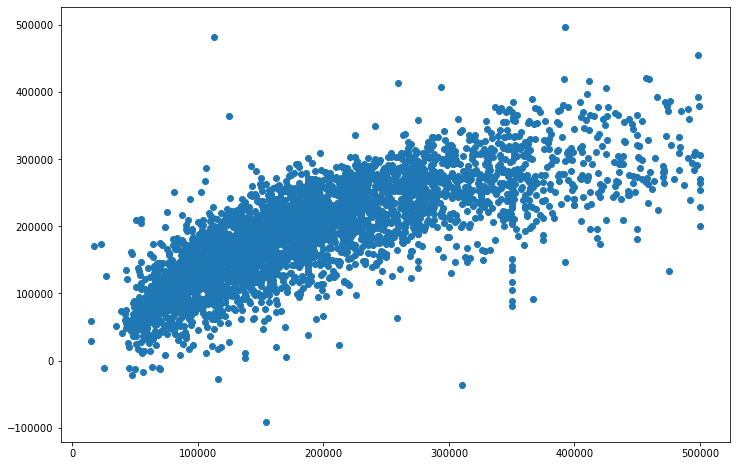

In [41]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [42]:
#Our test data has nearly 4k records now lets sample 100 of these predictions versus 
#actual values from the original dataframe

df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [43]:
df_pred_actual_sample.head()

,index,predicted,actual
0,17207,256256.00,357400.00
1,19238,246656.00,265200.00
2,10381,216128.00,238000.00
3,7503,133568.00,93300.00
4,6570,232576.00,238900.00


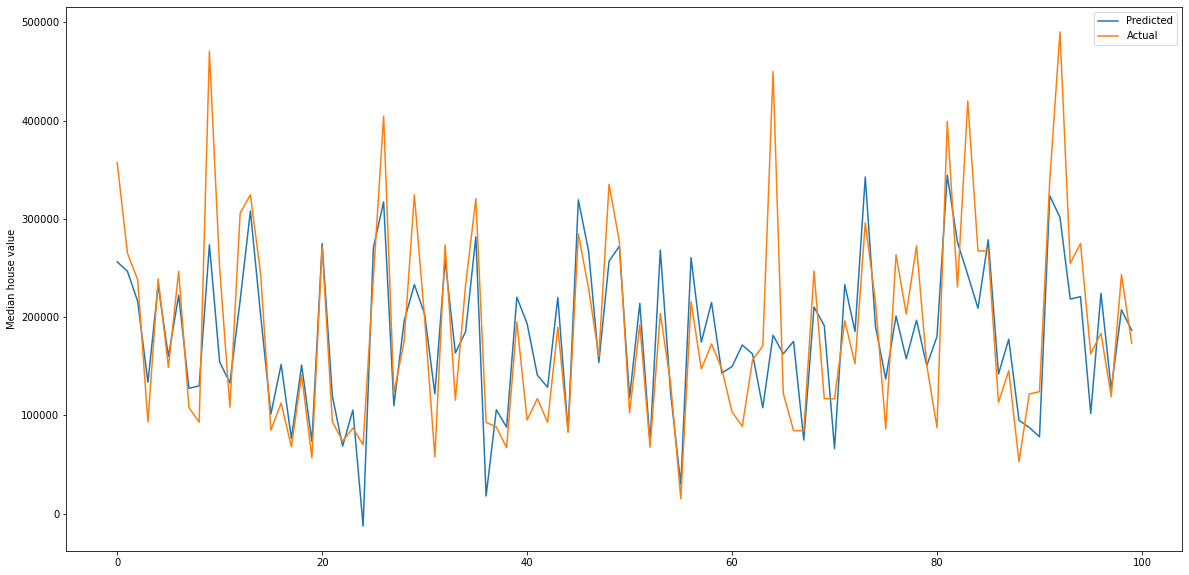

In [44]:
#Lets plto actual vs predicted values

plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('Median house value')
plt.legend()

plt.show()